In [185]:
# Import Packages
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings; warnings.simplefilter('ignore')

In [186]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [187]:
# Load Data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

In [188]:
cust_filter = data['cust_id'] == 'klant_266'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()

data['procesdag']=pd.to_datetime(data['procesdag'])
data = data.set_index(data.procesdag, drop=True)
data = data['2016-01-01':'2020-01-01']

In [189]:
data.drop(['procesdag'], axis='columns', inplace=True)
data.drop(['aantal_pakketten_volgende_dag'], axis='columns', inplace=True)

In [190]:
data.head()

,cust_id,aantal_pakketten,validation_column
procesdag,,,
2016-01-01,klant_266,0.0,train
2016-01-04,klant_266,172.0,train
2016-01-05,klant_266,44.0,train
2016-01-06,klant_266,54.0,train
2016-01-07,klant_266,53.0,train


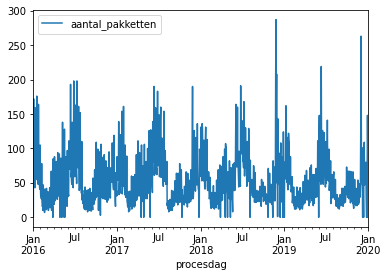

In [191]:
data.plot()

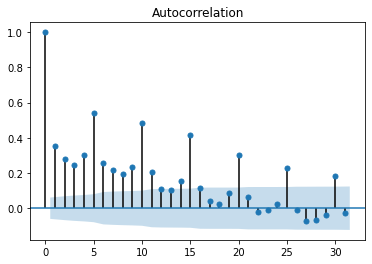

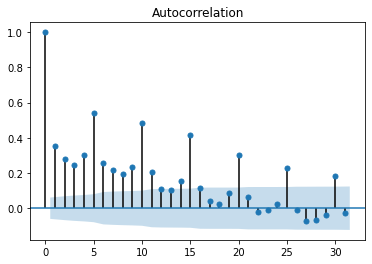

In [192]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['aantal_pakketten'])

In [193]:
data_diff = data['aantal_pakketten'].diff()[1:]
data_diff.head()

procesdag
2016-01-04    172.0
2016-01-05   -128.0
2016-01-06     10.0
2016-01-07     -1.0
2016-01-08    -10.0
Name: aantal_pakketten, dtype: float64

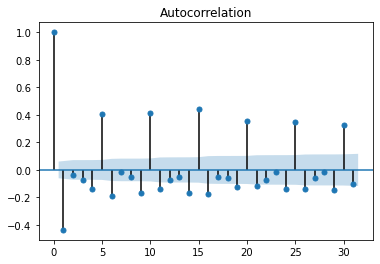

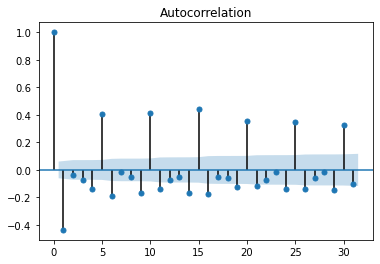

In [194]:
plot_acf(data_diff)

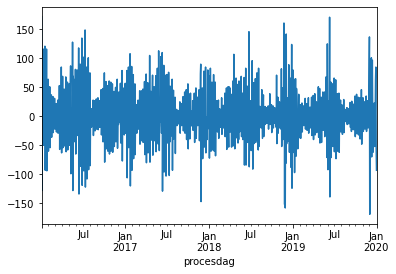

In [195]:
data_diff.plot()

In [196]:
X = data_diff.values
print(X.size)
train = X[0:500] # 500 training data
test = X[500:] # 22 testing data
predictions = []

1043


Root Mean Squared Error: 35.74801846665068


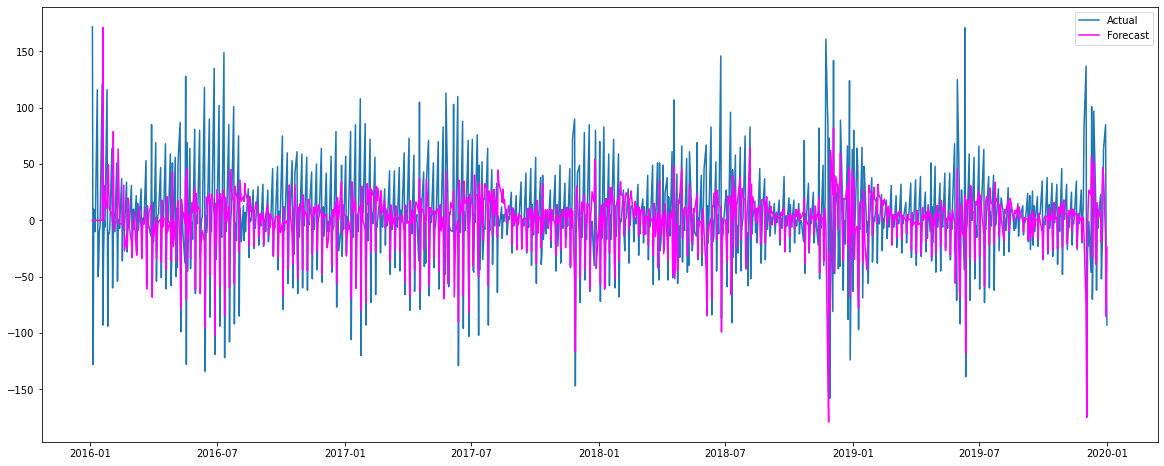

In [197]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

# Fit ARIMA Model
my_order = (1,0,1)
my_seasonal_order = (0, 1, 1, 11)
fig = plt.figure(figsize=(20,8))
model = SARIMAX(data_diff, order=my_order, seasonal_order=my_seasonal_order)
ax = plt.gca()
results = model.fit()
plt.plot(data_diff)
plt.plot(results.fittedvalues, color='magenta', alpha=1)
ax.legend(['Actual', 'Forecast'])
residuals = data_diff - results.fittedvalues
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 35.74801846665068


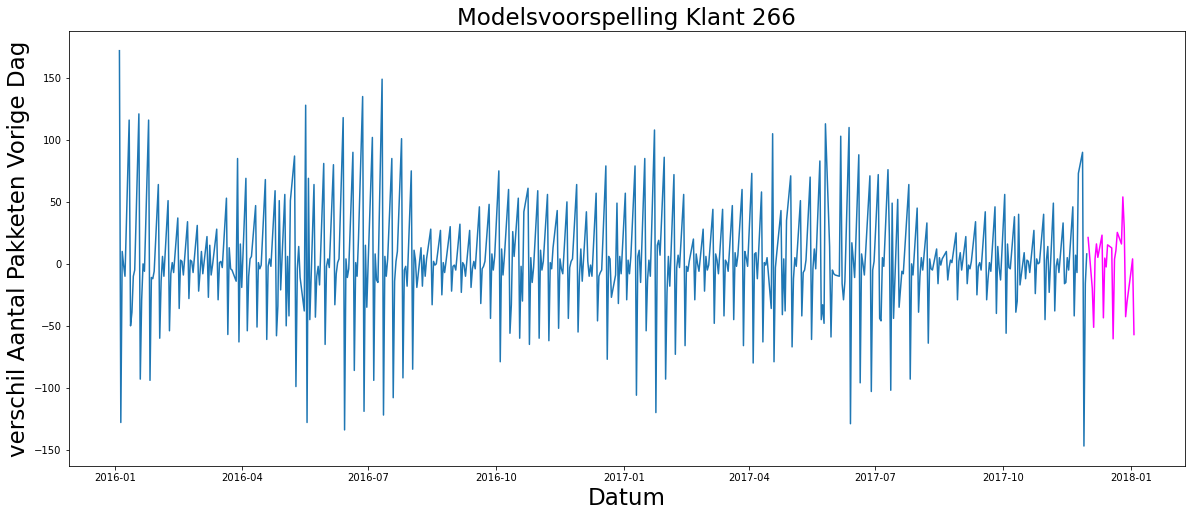

In [198]:
# Model only with December
fig = plt.figure(figsize=(20,8))
num_points = len(data_diff)
x = results.predict(start=(499), end=(522), dynamic=False)

plt.plot(data_diff[:499])
plt.plot(x, color='magenta')
plt.xlabel('Datum',fontsize= 23)
plt.ylabel('verschil Aantal Pakketen Vorige Dag',fontsize= 23)
plt.title('Modelsvoorspelling Klant 266',fontsize= 23)
residuals = data_diff - results.fittedvalues
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

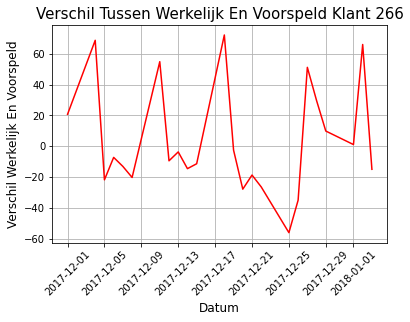

In [199]:
# Model with Difference
diff = data_diff - x
plt.plot(diff, color='red')
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Verschil Werkelijk En Voorspeld', fontsize=12)
plt.title('Verschil Tussen Werkelijk En Voorspeld Klant 266', fontsize=15)
plt.xticks(rotation=45)
plt.grid()